In [5]:
# install if needed
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [9]:
df = pd.read_csv(
    r"C:\Users\parna\Downloads\bank+marketing (1)\bank-additional\bank-additional\bank-additional-full.csv",
    sep=";"
)

df.head()




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
print("Shape:", df.shape)
print(df.info())
print(df['y'].value_counts())


Shape: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

In [11]:
# Check for missing / unknown
df.replace('unknown', np.nan, inplace=True)
print(df.isnull().sum())

# Simple approach: drop rows with missing values
df = df.dropna()
print("New Shape after drop:", df.shape)


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
New Shape after drop: (30488, 21)


In [12]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [13]:
X = df.drop('y', axis=1)
y = df['y']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

Accuracy: 0.9004591669399803

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      5304
           1       0.66      0.50      0.56       794

    accuracy                           0.90      6098
   macro avg       0.79      0.73      0.75      6098
weighted avg       0.89      0.90      0.89      6098



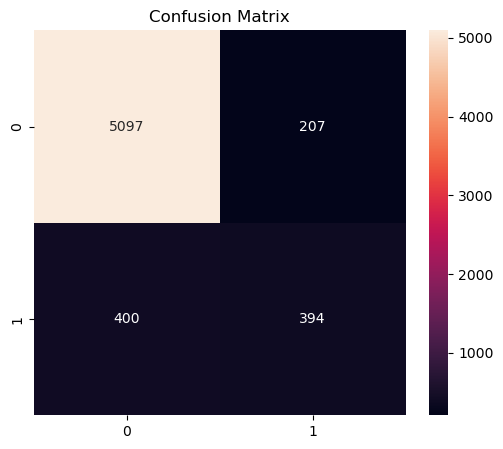

In [16]:
pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


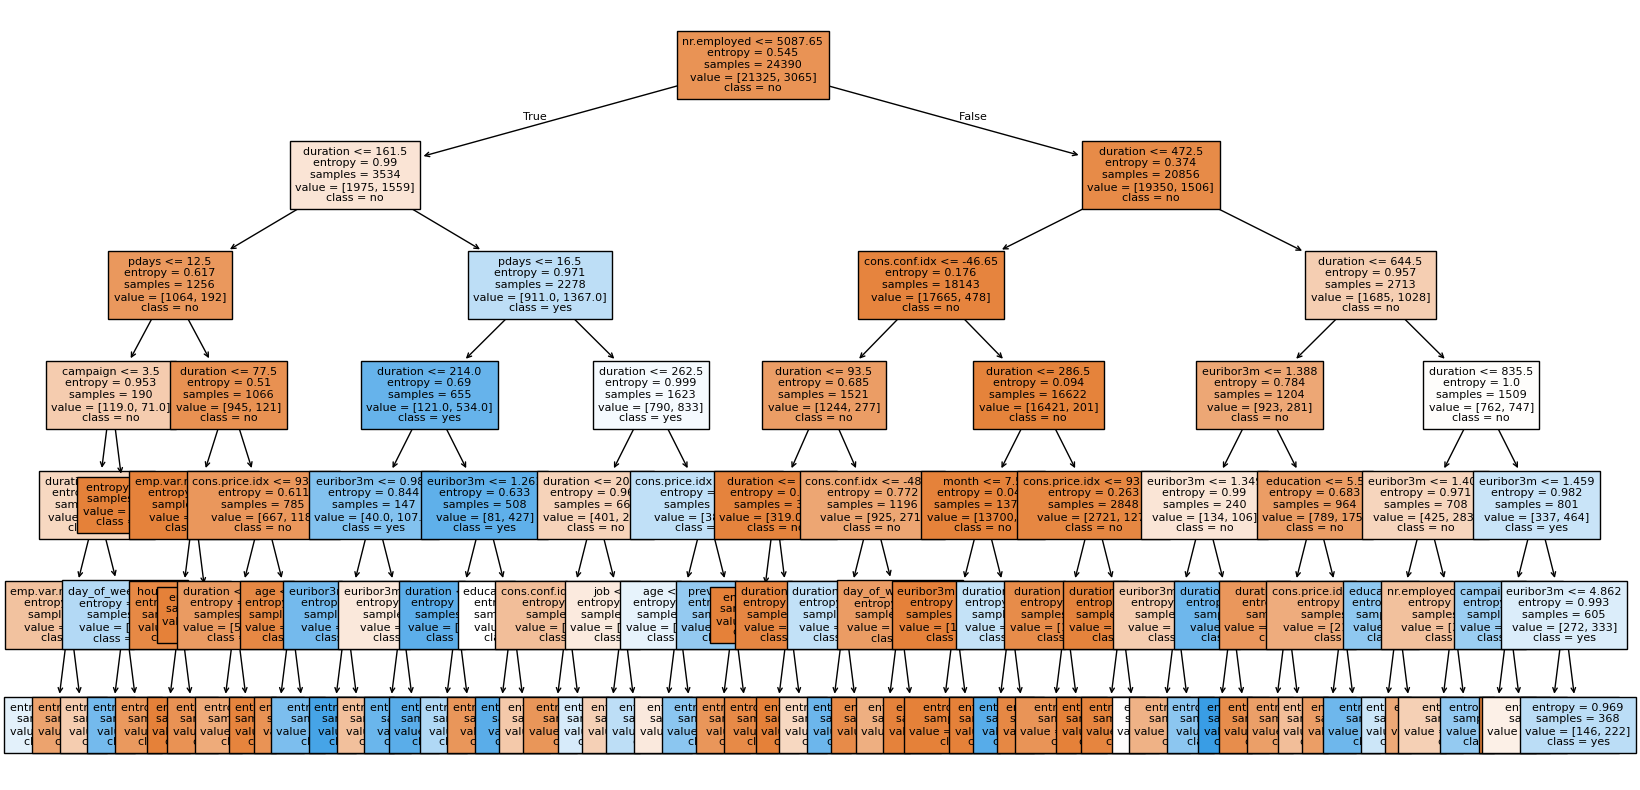

In [17]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['no','yes'], filled=True, fontsize=8)
plt.show()
